#Curso de Inteligencia Artificial y Machine Learning
### EOI - Garantía Juvenil
Módulo 7 - Deep Learning para Visión Artificial

Proyecto nº3

# Clasificación de imágenes con modelos de Deep Learning

En este proyecto, se pide contruir un modelo clasificador para distinguir entre imágenes de gatos y perros. Para ello, utilizaremos un dataset reducido extraido del famoso dataset de la competición de Kaggle de 2013 lanzada por Google "Dogs vs Cats"

Primero, importaremos las bibliotecas necesarias para este ejercicio

In [2]:
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Te recomendamos crear las variables de las rutas de los directorios de datos de entrenamiento y validación:

In [4]:
train_dir = 'cats_and_dogs_filtered/train'
validation_dir = 'cats_and_dogs_filtered/validation'

## 1. Modelo convolucional normal

Vas a entrenar un modelo de red neuronal convolucional con el dataset mencionado. Para ello, necesitamos hacer un preprocesamiento de las imágenes utilizando el módulo ImageDataGenerator que creará un generador que recorrerá los directorios de imágenes creados, adaptando las imágenes para que sean reconocibles por el modelo.

In [4]:
train_gen = ImageDataGenerator(rescale=1/255.0).flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

valid_gen = ImageDataGenerator(rescale = 1/255.0).flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


1.1. Construye un modelo que contenga capas convolucionales, de pooling y neuronales, incluyendo, al menos, dos capas convolucionales y dos capas neuronales.

In [71]:
model_conv = models.Sequential()

model_conv.add(layers.Conv2D(32, kernel_size=(3,3), input_shape = (150, 150, 3))) # capa de entrada con dimensiones de entrada
model_conv.add(layers.MaxPooling2D(pool_size=(2, 2))) # minimizamos el tamaño de las imágenes
model_conv.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model_conv.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_conv.add(layers.Flatten()) # las imágenes están en 3D por lo que tenemos que aplanarlas
model_conv.add(layers.Dense(128, activation='relu', use_bias=True)) # capa de 128 neuronas
model_conv.add(layers.Dense(1,activation='sigmoid')) # capa de salida

1.2. Compila el modelo usando función de coste 'binary_crossentropy', optimizador RMSprop (puedes hacerlo usando optimizer = optimizers.RMSprop(learning_rate = 1e-4), y métrica 'accuracy'

In [72]:
opt = optimizers.RMSprop(learning_rate = 1e-4)
model_conv.compile(optimizer = opt, loss='binary_crossentropy',
              metrics=['accuracy'])

1.3. Entrena el modelo con datos de entrenamiento y test preparados, utilizando, al menos, 30 epochs, y guarda los resultados de éste en una variable "history"

In [73]:
history = model_conv.fit(train_gen, epochs=30, validation_data=valid_gen)

Epoch 1/30
100/100 [==============================] - 52s 513ms/step - loss: 0.7250 - accuracy: 0.5250 - val_loss: 0.6537 - val_accuracy: 0.6080
Epoch 2/30
100/100 [==============================] - 58s 577ms/step - loss: 0.6505 - accuracy: 0.6135 - val_loss: 0.6235 - val_accuracy: 0.6570
Epoch 3/30
100/100 [==============================] - 59s 591ms/step - loss: 0.6090 - accuracy: 0.6700 - val_loss: 0.6410 - val_accuracy: 0.5770
Epoch 4/30
100/100 [==============================] - 67s 675ms/step - loss: 0.5761 - accuracy: 0.7240 - val_loss: 0.5998 - val_accuracy: 0.6940
Epoch 5/30
100/100 [==============================] - 70s 698ms/step - loss: 0.5410 - accuracy: 0.7375 - val_loss: 0.6095 - val_accuracy: 0.6350
Epoch 6/30
100/100 [==============================] - 65s 648ms/step - loss: 0.5094 - accuracy: 0.7570 - val_loss: 0.5695 - val_accuracy: 0.7160
Epoch 7/30
100/100 [==============================] - 67s 678ms/step - loss: 0.4774 - accuracy: 0.7815 - val_loss: 0.5622 - val_ac

Vamos a representar los resultados del entrenamiento. Te dejamos un código de ejemplo, en el que puedes adaptar los nombres de las variables que corresponda.

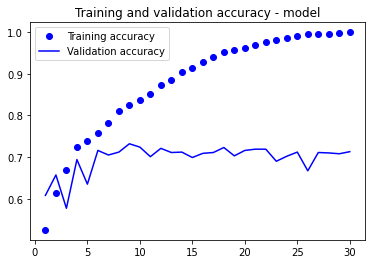

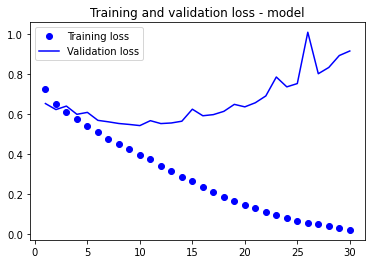

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo',label='Training accuracy')
plt.plot(epochs, val_acc, 'b',label='Validation accuracy')
plt.title('Training and validation accuracy - model')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss - model')
plt.legend()

1.4. ¿Qué conclusiones puedes sacar viendo las gráficas?¿Crees que hay overfitting?¿A qué crees que es debido?

Tanto los valores de **accuracy** y **loss** del conjunto de entrenamiento no son los deseados, ya que ambos van hacia valores extremos, lo cual nos está dando indicios de sobreajuste. A medida que el modelo realiza ejecuta más epochs, a partir de las 15-20 epochs comienza aprenderse de memoria la clasificación de las mismas.

Para poder solucionar esto, sería recomendable "apagar" determinadas neuronas de las capas densas y convolucionales utilizando capas de tipo drop. De esta manera podemos conseguir que el modelo sea un poco "más torpe" y evitemos el fenómeno de sobreajuste de los datos.

## 2. Modelo con Data Augmentation

Ahora vamos a intentar mejorar el modelo recurriendo a la técnica del "Data Augmentation" o aumentar el número de imágenes disponibles para el entrenamiento modificando ligeramente las que ya tenemos. Para ello, creamos, de nuevo, un generador, pero esta vez, con argumentos de modificación de las imágenes.

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               rotation_range=20,
                               shear_range=0.2,
                               horizontal_flip=True,
                               zoom_range=0.2)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_gen = train_datagen.flow_from_directory(train_dir,
                                              target_size = (150,150),
                                              batch_size = 32,
                                              class_mode = 'binary')

valid_gen = valid_datagen.flow_from_directory(validation_dir,
                                                target_size = (150,150),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Echamos un vistazo a las imágenes tras las modificaciones

1.0


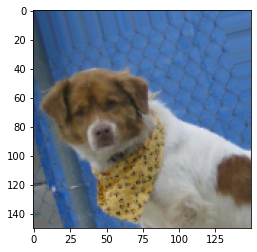

In [6]:
import matplotlib.pyplot as plt

batchX, batchY = next(train_gen)

plt.imshow(batchX[0])
print(batchY[0])

2.1. Construye un modelo similar al anterior, pero, esta vez, incluye una capa de dropout justo antes de la capa neuronal de mayor número de neuronas. Utiliza los mismos parámetros para la compilación, y realiza el entrenamiento, esta vez, con 100 epochs.

In [12]:
model_drop = models.Sequential()

model_drop.add(layers.Conv2D(32, kernel_size=(3,3), input_shape = (150, 150, 3))) # capa de entrada
model_drop.add(layers.MaxPooling2D(pool_size=(2, 2))) # downsizing images
model_drop.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model_drop.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_drop.add(layers.Flatten()) # las imágenes están en 3D por lo que tenemos que aplanarlas
model_drop.add(layers.Dropout(0.3, input_shape=(2,))) 
model_drop.add(layers.Dense(128, activation=tf.nn.relu, use_bias=True)) # capa de 128 neuronas
model_drop.add(layers.Dense(1,activation='sigmoid')) # capa de salida

In [13]:
opt2 = optimizers.RMSprop(learning_rate = 1e-4)
model_drop.compile(optimizer = opt2, loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model_drop.fit(train_gen, validation_data = valid_gen, epochs=100)

Epoch 1/100
63/63 [==============================] - 87s 1s/step - loss: 0.7658 - accuracy: 0.5275 - val_loss: 0.6960 - val_accuracy: 0.5110
Epoch 2/100
63/63 [==============================] - 60s 966ms/step - loss: 0.6853 - accuracy: 0.5455 - val_loss: 0.6568 - val_accuracy: 0.6340
Epoch 3/100
63/63 [==============================] - 56s 898ms/step - loss: 0.6754 - accuracy: 0.5690 - val_loss: 0.6524 - val_accuracy: 0.6050
Epoch 4/100
63/63 [==============================] - 59s 929ms/step - loss: 0.6626 - accuracy: 0.5900 - val_loss: 0.6336 - val_accuracy: 0.6490
Epoch 5/100
63/63 [==============================] - 61s 961ms/step - loss: 0.6543 - accuracy: 0.6010 - val_loss: 0.6295 - val_accuracy: 0.6250
Epoch 6/100
63/63 [==============================] - 61s 965ms/step - loss: 0.6546 - accuracy: 0.6120 - val_loss: 0.6405 - val_accuracy: 0.5970
Epoch 7/100
63/63 [==============================] - 63s 1s/step - loss: 0.6474 - accuracy: 0.6095 - val_loss: 0.6123 - val_accuracy: 0.653

2.2. Muestra, de nuevo, la representación de los resultados del entrenamiento en dos gráficas, una para el accuracy y otra para el loss.

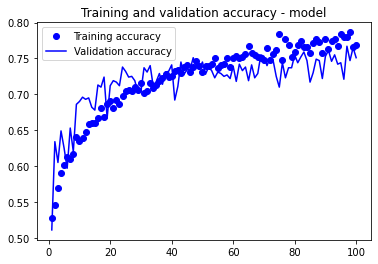

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure()
plt.plot(epochs, acc, 'bo',label='Training accuracy')
plt.plot(epochs, val_acc, 'b',label='Validation accuracy')
plt.title('Training and validation accuracy - model')
plt.legend()

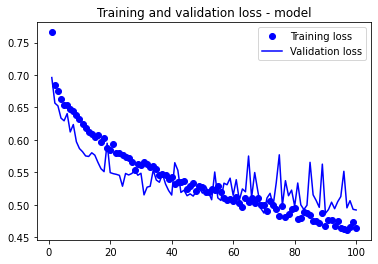

In [18]:
plt.figure()
plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss - model')
plt.legend()

2.3. ¿Qué conclusiones sacas viendo las gráficas?¿Ha mejorado el resultado del modelo?¿Hay overfitting? Comenta cualquier otra cosa que te haya llamado la atención.

Al añadir al modelo una capa de drop hemos podido hacer que se desactiven el 30% de las neuronas de la capa siguiente (de 128 neuronas) de forma aleatoria, se ha conseguido regularizar el modelo y reducir el overfitting.

En las gráficas se muestra que el comportamiento no llega a valores extremos. Ahora para el **accuracy** se queda cerca del 0.8, es decir, posee una alta tasa de clasificación correcta de las imágenes en el conjunto de datos de entrenamiento, y valor similar obtenido para el dataset de test. En mi opinión, considero que es un valor muy adecuado ya que nos interesa que sea alto pero no demasiado para no caer en el overfitting, ya que no es interesante un modelo que diga a todo que sí. De esta manera, se ha conseguido que, aproximadamente, 8 de cada 10 imágenes que reciba el modelo sean correctamente clasificadas.

Y en el caso de la métrica **loss**, la gráfica nos muestra que la difererencia entre las predicciones del modelo y la clasificación real del conjunto de datos de entrenamiento ha dismininuido hasta alcanzar los 0.46, valor incluso algo menor que el **loss** correspondiente al conjunto de test. También se puede ver que se ha conseguido el propósito de minimizar esta pérdida durante el proceso de entrenamiento.